<a href="https://colab.research.google.com/github/greenmantice18/Internship-AIML/blob/main/CONFUSION_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONFUSION MATRIX**



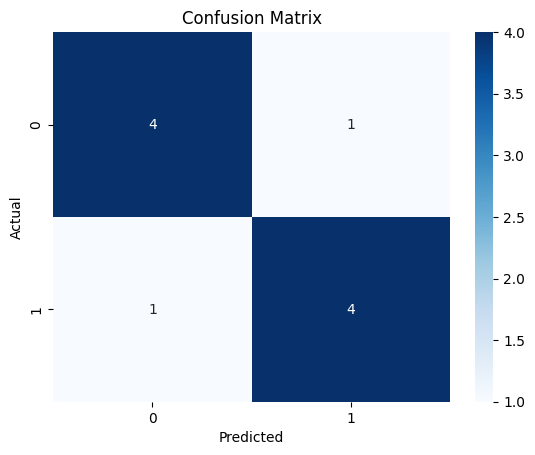

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Actual labels and the values your model predicted
y_actual = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred   = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Generate the matrix
cm = confusion_matrix(y_actual, y_pred)

# Visualize it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the full report (Precision, Recall, F1)
print(classification_report(y_actual, y_pred))


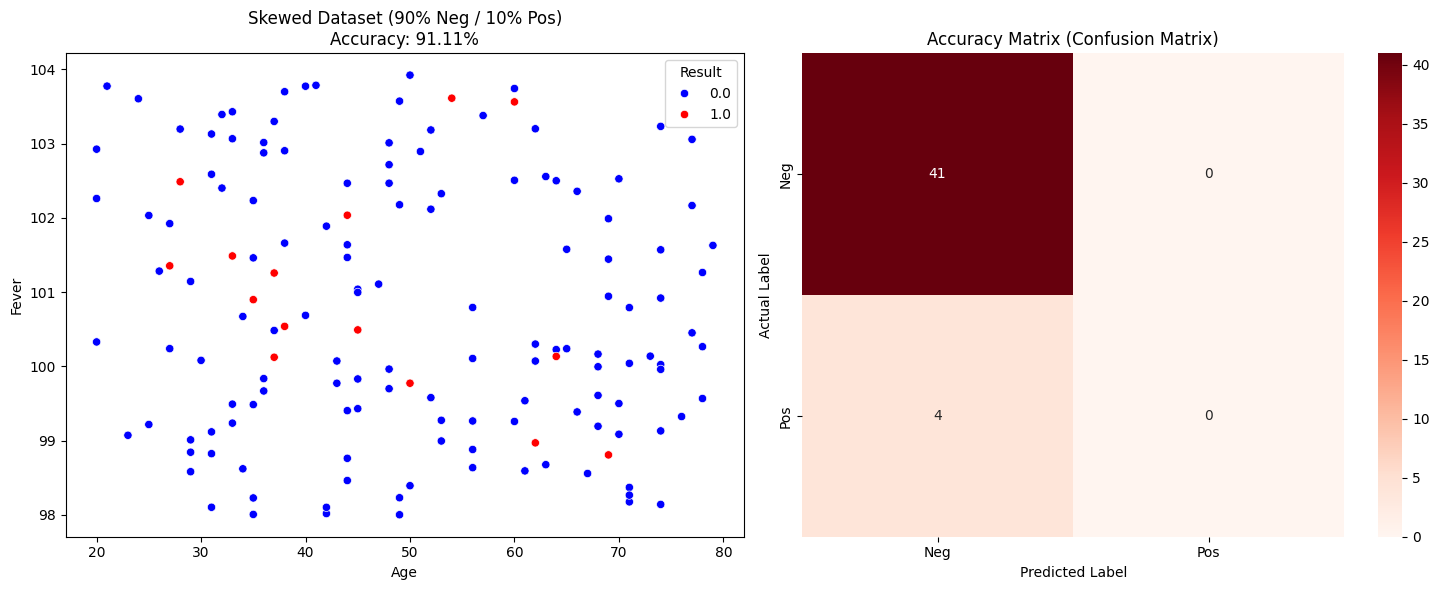

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95        41
    Positive       0.00      0.00      0.00         4

    accuracy                           0.91        45
   macro avg       0.46      0.50      0.48        45
weighted avg       0.83      0.91      0.87        45



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# --- 1. CREATE SKEWED DATASET (90% Negative, 10% Positive) ---
np.random.seed(10)
n_samples = 150

age = np.random.randint(20, 80, n_samples)
fever = np.random.uniform(98, 104, n_samples)

# We force most samples to be 0 (Negative)
# Only a small, very specific group will be 1 (Positive)
y = np.zeros(n_samples)
positive_indices = np.random.choice(range(n_samples), size=15, replace=False)
y[positive_indices] = 1

df = pd.DataFrame({'Age': age, 'Fever': fever, 'Result': y})

# --- 2. TRAIN-TEST SPLIT ---
X = df[['Age', 'Fever']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. TRAIN LOGISTIC REGRESSION ---
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 4. ACCURACY & CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# --- VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Dataset Distribution (Notice how few 'Positive' dots there are)
sns.scatterplot(x='Age', y='Fever', hue='Result', data=df, ax=axes[0], palette=['blue', 'red'])
axes[0].set_title(f'Skewed Dataset (90% Neg / 10% Pos)\nAccuracy: {acc*100:.2f}%')

# Plot 2: Accuracy (Confusion) Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')
axes[1].set_title('Accuracy Matrix (Confusion Matrix)')
axes[1].set_xticklabels(['Neg', 'Pos'])
axes[1].set_yticklabels(['Neg', 'Pos'])

plt.tight_layout()
plt.show()

# --- 5. THE "TRAP" REVEALED ---
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))